In [1]:
#Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the data
data = pd.read_csv('Purchase.csv')
print(data.head())
print(data.shape)
print(data.groupby('Purchased').size()) #class distribution

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
(400, 5)
Purchased
0    257
1    143
dtype: int64


In [3]:
#Dummy variable encoding and removing dummy variable trap
Gender = pd.get_dummies(data["Gender"], drop_first=True)
Gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [4]:
data = pd.concat([data, Gender], axis =1)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [5]:
data.drop(["User ID", "Gender"], axis =1, inplace=True)
data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [6]:
X = data.drop(["Purchased"], axis =1)
Y = data["Purchased"]
X.head()

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [7]:
sc = StandardScaler()
SC_X = pd.DataFrame(sc.fit_transform(X))
SC_X.head()

,0,1,2
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204


In [8]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(SC_X, Y, test_size = 0.25, random_state = 0)


In [9]:
#Model Building
LR = LogisticRegression(random_state=12)
LR_model = LR.fit(X_train, Y_train)

In [10]:
Y_test_pred = LR.predict(X_test)

In [11]:
Te_Acc = accuracy_score(Y_test, Y_test_pred)
print("Test Accuracy: ", Te_Acc)

Test Accuracy:  0.91


In [12]:
#Assessment metrics
CM = confusion_matrix(Y_test, Y_test_pred)
print("CM= ", CM)
#confusion matrix of sklearn: row wise it is "actual" and column wise "prediction"

print("Recall score: {}".format(recall_score(Y_test, Y_test_pred)))
print("Precision score: {}".format(precision_score(Y_test, Y_test_pred)))
print("f1 score: {}\n".format(f1_score(Y_test, Y_test_pred)))
print(classification_report(Y_test, Y_test_pred))

CM=  [[65  3]
 [ 6 26]]
Recall score: 0.8125
Precision score: 0.896551724137931
f1 score: 0.8524590163934426

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        68
           1       0.90      0.81      0.85        32

    accuracy                           0.91       100
   macro avg       0.91      0.88      0.89       100
weighted avg       0.91      0.91      0.91       100



In [13]:
#ROC Curve
Y_prob = LR_model.predict_proba(X_test)
Y_prob = Y_prob[:, 1]# keep probabilities for the positive class only

In [14]:
LR_AUC = roc_auc_score(Y_test, Y_prob)
print('LR: ROC AUC=',LR_AUC) 
LR_fpr, LR_tpr, _ = roc_curve(Y_test, Y_prob)

LR: ROC AUC= 0.9549632352941175


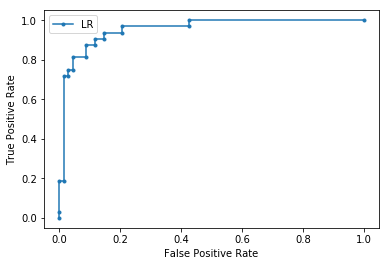

In [15]:
#Plotting ROC Curve
plt.plot(LR_fpr, LR_tpr, marker='.', label='LR')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()